<a href="https://colab.research.google.com/github/kienprojects/Machine-Learning-course/blob/main/K_Means_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Homework**

Aug 23, 2024

---



## **Bài tập**

***Mục tiêu:***


*   Tự viết lại code cho giải thuật K-means.
*   Hiểu sâu hơn giải thuật K-means qua việc tự viết lại code.
*   Ứng dụng mô hình tự viết vào các bài toán đã ra trên lớp.

***Dữ liệu:***
*   **Bài toán mô phỏng Kmeans**: Sử dụng hàm sinh dữ liệu tự động của sklearn (sinh ra các điểm ngẫu nhiên theo phân phối Gauss). Mỗi dữ liệu là một điểm trên mặt phẳng Oxy.
*   **Bài toán nén ảnh**: Ảnh bird_small.png (Hình ảnh về một chú chim).
    

***Yêu cầu***


*   Code K-means tự viết cho kết quả tương đương (không cần giống hệt) với giải thuật của thư viện sklearn khi áp dụng cho dữ liệu sinh ngẫu nhiên và dữ liệu ảnh


## **Import các thư viện**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/VINBIGDATA/MachineLearning/00_Assignment/08_K-Means

/content/drive/.shortcut-targets-by-id/1TvCG3X3dcbtWR5iQlJl5HnUNGb5lsmIA/00_Assignment/08_K-Means


## **Chuẩn bị dữ liệu**

*   Sinh dữ liệu ngẫu nhiên `n_samples = 100` tương đương 100 điểm
*   Mỗi điểm dữ liệu có 2 chiều


In [2]:
n_samples = 100
random_state = 170
center_points = [[1, 1], [-1, -1], [1, -1]] # sinh ngẫu nhiên các điểm xung quanh vị trí tâm cố định
#center_points = 3                           # tâm cụm được chọn ngẫu nhiên

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:6])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 1.26241305  0.94872541]
 [-0.39743873 -1.18567406]
 [ 1.35081331  0.48041993]
 [ 1.21219555  0.98929291]
 [-0.75344338 -1.09784774]
 [ 2.67199591 -0.16659988]]


## **Vẽ các điểm ảnh sử dụng matplotlib**

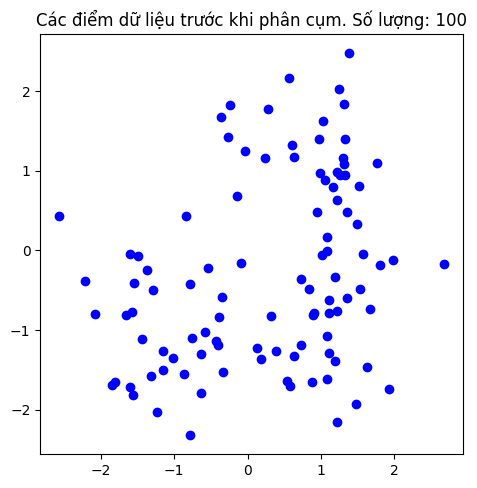

In [3]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}".format(n_samples))
plt.show()

## **Tự xây dựng giải thuật K-means**

In [4]:
def k_init(X, n_cluster):
    # Chọn ngẫu nhiên n_cluster điểm từ X làm tâm cụm ban đầu
    idx = np.random.choice(X.shape[0], n_cluster, replace=False)
    return X[idx]

#test k_init
k_cluster = 3
init_centroid = k_init(X, n_cluster = k_cluster)
init_centroid

array([[-1.6070109 , -1.71177668],
       [-0.14603304,  0.68050449],
       [-0.86633482, -1.54985326]])

In [5]:
def k_means(X, n_cluster, max_iter=100, tol=1e-4):
    # Khởi tạo tâm cụm
    centroids = k_init(X, n_cluster)

    for _ in range(max_iter):
        # Tính khoảng cách từ mỗi điểm đến các tâm cụm
        distances = euclidean_distances(X, centroids)

        # Gán nhãn cho từng điểm dữ liệu
        labels = np.argmin(distances, axis=1)

        # Cập nhật tâm cụm
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_cluster)])

        # Kiểm tra điều kiện dừng
        if np.sum((new_centroids - centroids) ** 2) < tol:
            break

        centroids = new_centroids

    return centroids, labels
    #################

## **Ứng dụng giải thuật K-means tự viết cho dữ liệu sinh ngẫu nhiên**

[1 2 1 1 2 0 1 2 0 1 0 2 2 0 0 2 2 0 0 1 0 0 0 1 2 2 1 2 2 1 1 1 2 1 1 0 1
 1 2 0 0 1 2 0 0 2 2 0 2 0 1 2 0 0 2 1 0 0 1 2 0 2 0 2 0 1 2 1 1 1 0 2 2 2
 2 2 0 2 1 0 0 0 0 2 0 2 1 0 0 1 1 1 2 0 1 2 1 2 1 2]
[[ 1.11177838 -0.94555162]
 [ 0.88823619  1.19442485]
 [-1.13949326 -0.97100768]]


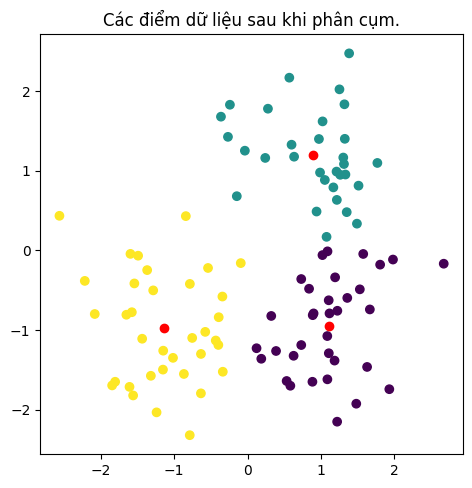

In [6]:
best_centroid, label = k_means(X = X, n_cluster = 3)
print(label)
print(best_centroid)
plt.figure(figsize=(12, 12))
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(best_centroid[:, 0], best_centroid[:, 1], c='red')
plt.title("Các điểm dữ liệu sau khi phân cụm.")
plt.show()

## **Ứng dụng K-means tự viết vào nén ảnh**

In [7]:
from skimage import io

import matplotlib.image as image
from IPython.core.display import Image, display

### Đọc dữ liệu hình ảnh
- Mỗi điểm ảnh là 1 mẫu quan sát
- Phân cụm tập dữ liệu (tập các điểm ảnh) về k nhãn

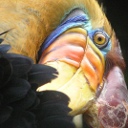

Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều =  3


In [10]:
path_img = 'data/bird_small.png'
display(Image(path_img, width=250, unconfined=True))
img = io.imread(path_img)
data_img = (img / 255.0).reshape(-1,img.shape[2]) # chuyển ma trận 128x128x3 về mảng 2 chiều
img_shape = img.shape

print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều = ", data_img.shape[1])

### Nén ảnh bằng giải thuật K-means tự viết

In [12]:
n_color = 10
best_centroid, label = k_means(data_img, n_cluster = n_color)
img_128 = best_centroid[label]

# chuẩn hoá lại kích thước ảnh theo chiều dài, chiều rộng ban đầu
img_128=np.reshape(img_128, img_shape)
image.imsave('/content/img_128.png', img_128)

Ảnh nén bằng K-means tự viết


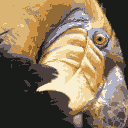

Ảnh nén bằng K-means của thư viện 


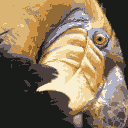

Ảnh gốc


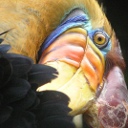

In [17]:
print('Ảnh nén bằng K-means tự viết')
display(Image('/content/img_128.png', width=250, unconfined=True))
print('Ảnh nén bằng K-means của thư viện ')
display(Image('/content/img_128.png', width=250, unconfined=True))
print('Ảnh gốc')
display(Image(path_img, width=250, unconfined=True))